In [2]:
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

In [3]:
ipo_details = pd.read_excel("./datasets/IPO_details.xlsx")
ipo_df = pd.read_csv("./datasets/COTAHIST_A2015_2021.csv")

In [4]:
tickers = list(ipo_details.Tickers)
openings = list(ipo_details.Preco_fixado)
dict_tickers = dict(zip(tickers, openings))

In [5]:
def rentability(ticker, dias_uteis, dict_ticker=dict_tickers, data=ipo_df):
    ticker = ticker.upper()
    df = data[data.codneg==ticker]
    df = df.reset_index(drop=True)
    variation = ((df["preult"].iloc[dias_uteis-1]/dict_ticker[ticker])-1)*100
    return variation

In [6]:
list_rent_1d = []

for t in tickers:
    list_rent_1d.append(rentability(t, 1))

dict_rent_1d = dict(zip(tickers,list_rent_1d))

In [7]:
dict_rent_1d

{'WIZS3': 12.733171127331723,
 'AALR3': -4.0000000000000036,
 'MOVI3': -2.6666666666666727,
 'PARD3': 8.947368421052637,
 'AZUL4': 6.666666666666665,
 'CRFB3': -0.6666666666666599,
 'IRBR3': 7.525697503671069,
 'OMGE3': 5.769230769230771,
 'CAML3': -0.11111111111110628,
 'BKBR3': -1.9444444444444486,
 'BRDT3': 6.666666666666665,
 'GNDI3': 22.72727272727273,
 'HAPV3': 22.765957446808514,
 'BIDI4': -0.5405405405405461,
 'SBFG3': -1.5999999999999903,
 'NEOE3': 8.370607028754007,
 'VIVA3': 0.45833333333333837,
 'BMGB4': -27.586206896551722,
 'CEAB3': 3.0909090909090997,
 'MTRE3': 7.772020725388606,
 'LWSA3': 19.42028985507247,
 'MDNE3': -2.631578947368418,
 'PRNR3': 34.00000000000001,
 'ALPK3': -9.047619047619037,
 'AMBP3': 18.38383838383839,
 'SOMA3': 11.41414141414141,
 'DMVF3': -8.352941176470585,
 'LJQQ3': 1.1067193675889264,
 'LAVV3': -5.263157894736848,
 'PGMN3': 21.176470588235308,
 'PETZ3': 21.818181818181827,
 'PLPL3': 0.0,
 'MELK3': -1.764705882352946,
 'HBSA3': -1.85185185185184

In [8]:
df_rent = pd.DataFrame.from_dict(dict_rent_1d, orient='index').rename(columns={0:'Rentabilidade_1D'})
df_rent = df_rent.reset_index().rename(columns={'index':'Ticker'})
df_rent

,Ticker,Rentabilidade_1D
0,WIZS3,12.733171
1,AALR3,-4.000000
2,MOVI3,-2.666667
3,PARD3,8.947368
4,AZUL4,6.666667
...,...,...
64,GGPS3,6.666667
65,SOJA3,46.464646
66,CXSE3,3.929679
67,MODL11,-7.296352


In [9]:
df_rent = df_rent.sort_values("Rentabilidade_1D", ascending = False).reset_index(drop=True)

In [10]:
df_rent.head(15)

,Ticker,Rentabilidade_1D
0,MOSI3,96.969697
1,SOJA3,46.464646
2,PRNR3,34.000000
3,MBLY3,25.714286
4,INTB3,25.333333
5,HAPV3,22.765957
6,GNDI3,22.727273
7,PETZ3,21.818182
8,PGMN3,21.176471
9,VAMO3,19.423077


In [11]:
menor_m15 = entremenos15_e_menos10 = entremenos10_e_men5 = entremen5_e_0 = entre0_e_5 = entre5_e_10 = entre10_e_15 = maior_15 = 0
for i in range(df_rent.index.max() + 1):
    
    if (df_rent.loc[i, 'Rentabilidade_1D']) < -15:
        menor_m15 += 1
        
    elif(df_rent.loc[i, 'Rentabilidade_1D']) >= -15 and (df_rent.loc[i, 'Rentabilidade_1D']) < -10:
        entremenos15_e_menos10 += 1
        
    elif(df_rent.loc[i, 'Rentabilidade_1D']) >= -10 and (df_rent.loc[i, 'Rentabilidade_1D']) <-5:
        entremenos10_e_men5 += 1
    
    elif(df_rent.loc[i, 'Rentabilidade_1D']) >= -5 and (df_rent.loc[i, 'Rentabilidade_1D']) <0:
        entremen5_e_0 += 1 
    
    elif(df_rent.loc[i, 'Rentabilidade_1D']) >= 0 and (df_rent.loc[i, 'Rentabilidade_1D']) <5:
        entre0_e_5 += 1 
        
    elif(df_rent.loc[i, 'Rentabilidade_1D']) >= 5 and (df_rent.loc[i, 'Rentabilidade_1D']) <10:
        entre5_e_10 += 1 
        
    elif(df_rent.loc[i, 'Rentabilidade_1D']) >= 10 and (df_rent.loc[i, 'Rentabilidade_1D']) <15:
        entre10_e_15 += 1 
        
    elif(df_rent.loc[i, 'Rentabilidade_1D']) >15:
        maior_15 += 1 

In [12]:
df = pd.DataFrame({'< -15%': menor_m15, '-15% to -10%': entremenos15_e_menos10, '-10% to -5%': entremenos10_e_men5, 
                   '-5% to 0%': entremen5_e_0, '0% to 5%': entre0_e_5, '5% to 10%': entre5_e_10, 
                   '10% to 15%': entre10_e_15, '> 15%': maior_15}, index = [0])

In [13]:
DF = df.T

In [14]:
DF = DF.reset_index().rename(columns={'index':'Valor'})

In [15]:
DF = DF.rename(columns={0:'Quantidade'})

In [18]:
DF

,Valor,Quantidade
0,< -15%,1
1,-15% to -10%,1
2,-10% to -5%,7
3,-5% to 0%,20
4,0% to 5%,11
5,5% to 10%,12
6,10% to 15%,2
7,> 15%,15


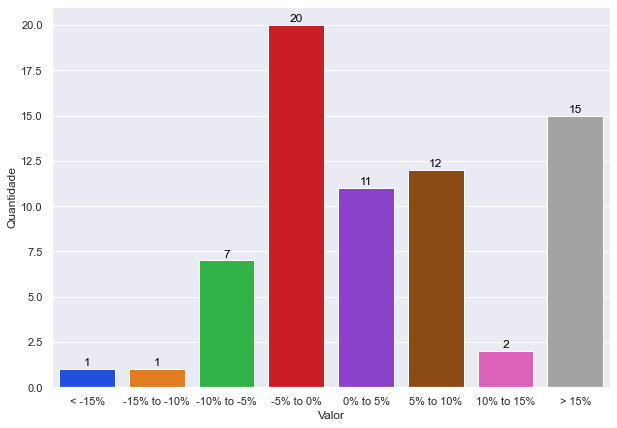

In [17]:
sns.set(rc={'figure.figsize':(10,7)})
sns.set_palette('bright')
plot = sns.barplot(data=DF, x='Valor', y='Quantidade')
for index, row in DF.iterrows():
    plot.text(row.name, row.Quantidade+0.175, round(row.Quantidade,2), color="black", ha="center")